<a href="https://colab.research.google.com/github/annu-creator24t/Model_training-_EEG/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive if files are stored there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:36:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


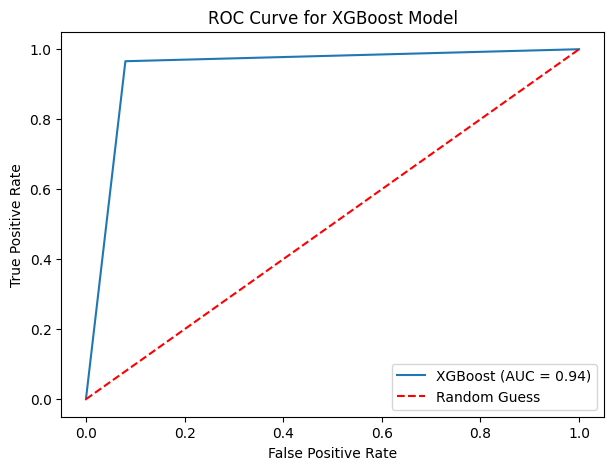

Model Accuracy: 94.29%
Confusion Matrix:
 [[161  14]
 [  6 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       175
           1       0.92      0.97      0.94       175

    accuracy                           0.94       350
   macro avg       0.94      0.94      0.94       350
weighted avg       0.94      0.94      0.94       350



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Load the dataset
csv_path = "/content/drive/MyDrive/Testing_Export_4_0.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns (File and Channel since they are not useful for prediction)
df = df.drop(columns=["File", "Channel", "DFA"])

# Shuffle the dataset
df = df.sample(frac=1, random_state=82).reset_index(drop=True)

# Define features (X) and target (y)
X = df.drop(columns=["Patient_Type"])  # Features
y = df["Patient_Type"]  # Target (0 = Healthy, 1 = Depressed)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Store predictions in a DataFrame
test_df = pd.DataFrame({'True': y_test, 'XGBoost': y_pred_xgb})

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
fpr, tpr, _ = roc_curve(test_df['True'], test_df['XGBoost'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend()
plt.show()

# Print evaluation metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
